In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import datetime
import seaborn as sns

In [262]:
# import state data
places=['CA','FLA','NE','NY']
state_data={}
for i in places:
    state_data[i]=pd.read_csv(f'net_gen_hr_{i}.csv', header=0).copy()
    state_data[i]['Date']=pd.to_datetime(state_data[i]['Date'])

In [304]:
#create separate datasets outside of dict
ca=state_data['CA'].copy()
fla=state_data['FLA'].copy()
ne=state_data['NE'].copy()
ny=state_data['NY'].copy()

In [ ]:
state_data['CA']=state_data['CA'][:10852]
state_data['FLA']=state_data['FLA'][:10968]
#NY & NE have no errors
state_data['FLA']['WAT']=state_data['FLA']['WAT'].apply(lambda x: int(float(x)))
state_data['CA']['WAT']=state_data['CA']['WAT'].apply(lambda x: int(float(x)))
state_data['CA']['OTH']=state_data['CA']['OTH'].apply(lambda x: int(float(x)))
state_data['CA']['WND']=state_data['CA']['WND'].apply(lambda x: int(float(x)))
ca=state_data['CA'].copy()
fla=state_data['FLA'].copy()
ne=state_data['NE'].copy()
ny=state_data['NY'].copy()

In [264]:
def month_col(df,dates):
    '''
    Function should be passed a dataframe and name of date column
    Returns a new data frame with with month column
    '''
    df['months']=df[dates].apply(lambda x: x.month)
    
    return df

In [265]:
def hour_col(df,dates):
    '''
    Function should be passed a dataframe and name of date column
    Returns a new data frame with with hour column
    '''
    df['hour']=df[dates].apply(lambda x: x.hour)
    
    return df

In [266]:
#add a month and hour column to each data set, rerun cell 3 afterwards to reset dataframes
for i in places:
    state_data[i]=month_col(state_data[i],'Date')
    state_data[i]=hour_col(state_data[i],'Date')


In [302]:
def total_col(df,cols):
    '''
    Function should be passed a dataframe and name of columns to be summed
    Returns a new data frame with a column of summed values
    '''
    df['TOT']=[sum([row[a] for a in cols]) for i,row in df.iterrows()]
    return df

In [461]:
state_data['FLA']=time_of_day_col(state_data['FLA'],'hour')
state_data['CA']=time_of_day_col(state_data['CA'],'hour')
state_data['NE']=time_of_day_col(state_data['NE'],'hour')
state_data['NY']=time_of_day_col(state_data['NY'],'hour')
state_data['FLA']=season_col(state_data['FLA'],'months')
state_data['CA']=season_col(state_data['CA'],'months')
state_data['NE']=season_col(state_data['NE'],'months')
state_data['NY']=season_col(state_data['NY'],'months')
ca=state_data['CA'].copy()
fla=state_data['FLA'].copy()
ne=state_data['NE'].copy()
ny=state_data['NY'].copy()

In [303]:
state_data['CA']=total_col(state_data['CA'],['COL','NG','WAT','OTH','OIL','SUN','WND','NUC'])
state_data['NE']=total_col(state_data['NE'],['COL','NG','WAT','OTH','OIL','SUN','WND','NUC'])
state_data['NY']=total_col(state_data['NY'],['COL','NG','WAT','OTH','OIL','SUN','WND','NUC'])
state_data['FLA']=total_col(state_data['FLA'],['COL','NG','WAT','OTH','OIL','SUN','NUC'])

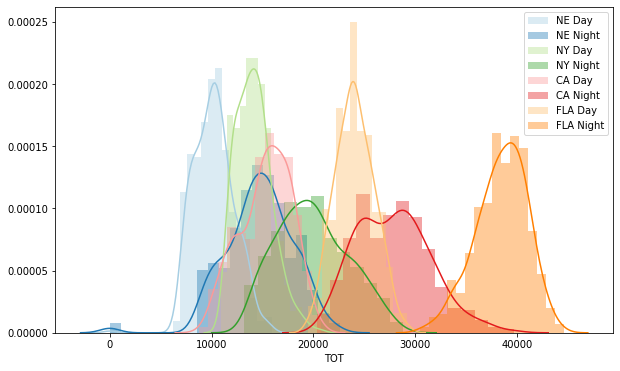

In [358]:
plt.figure(figsize=(10,6))
sns.set_palette(sns.color_palette("Paired"))
sns.distplot(ne['TOT'].loc[((ne.hour==1)|(ne.hour==2)|(ne.hour==3))&((ne.months==6)|(ne.months==7)|(ne.months==8))], label = "NE Day")
sns.distplot(ne['TOT'].loc[((ne.hour==13)|(ne.hour==14)|(ne.hour==15))&((ne.months==6)|(ne.months==7)|(ne.months==8))], label = "NE Night")
sns.distplot(ny['TOT'].loc[((ny.hour==1)|(ny.hour==2)|(ny.hour==3))&((ny.months==6)|(ny.months==7)|(ny.months==8))], label = "NY Day")
sns.distplot(ny['TOT'].loc[((ny.hour==13)|(ny.hour==14)|(ny.hour==15))&((ny.months==6)|(ny.months==7)|(ny.months==8))], label = "NY Night")
sns.distplot(ca['TOT'].loc[((ca.hour==1)|(ca.hour==2)|(ca.hour==3))&((ca.months==6)|(ca.months==7)|(ca.months==8))], label = "CA Day")
sns.distplot(ca['TOT'].loc[((ca.hour==13)|(ca.hour==14)|(ca.hour==15))&((ca.months==6)|(ca.months==7)|(ca.months==8))], label = "CA Night")
sns.distplot(fla['TOT'].loc[((fla.hour==1)|(fla.hour==2)|(fla.hour==3))&((fla.months==6)|(fla.months==7)|(fla.months==8))], label = "FLA Day")
sns.distplot(fla['TOT'].loc[((fla.hour==13)|(fla.hour==14)|(fla.hour==15))&((fla.months==6)|(fla.months==7)|(fla.months==8))], label = "FLA Night")
# plt.xlabel('Electric Generation from Natural Gas')
plt.legend()

In [410]:
blues=['cadetblue','c','midnightblue','steelblue']
greens=['darkolivegreen','olive','darkgreen','palegreen']
reds=['firebrick','red','orangered','salmon']
purps=['hotpink','pink','purple','mediumorchid']

In [425]:
winter=[12,1,2,'Winter']
summer=[6,7,8,'Summer']
day=[13,14,15,'Day']
night=[1,2,3,'Night']

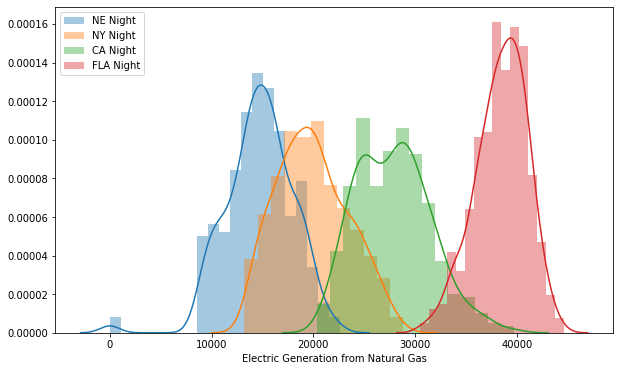

In [347]:
plt.figure(figsize=(10,6))
# sns.distplot(ne['TOT'].loc[((ne.hour==1)|(ne.hour==2)|(ne.hour==3))&((ne.months==6)|(ne.months==7)|(ne.months==8))], label = "NE Day")
sns.distplot(ne['TOT'].loc[((ne.hour==13)|(ne.hour==14)|(ne.hour==15))&((ne.months==6)|(ne.months==7)|(ne.months==8))], label = "NE Night")
# sns.distplot(ny['TOT'].loc[((ny.hour==1)|(ny.hour==2)|(ny.hour==3))&((ny.months==6)|(ny.months==7)|(ny.months==8))], label = "NY Day")
sns.distplot(ny['TOT'].loc[((ny.hour==13)|(ny.hour==14)|(ny.hour==15))&((ny.months==6)|(ny.months==7)|(ny.months==8))], label = "NY Night")
# sns.distplot(ca['TOT'].loc[((ca.hour==1)|(ca.hour==2)|(ca.hour==3))&((ca.months==6)|(ca.months==7)|(ca.months==8))], label = "CA Day")
sns.distplot(ca['TOT'].loc[((ca.hour==13)|(ca.hour==14)|(ca.hour==15))&((ca.months==6)|(ca.months==7)|(ca.months==8))], label = "CA Night")
# sns.distplot(fla['TOT'].loc[((fla.hour==1)|(fla.hour==2)|(fla.hour==3))&((fla.months==6)|(fla.months==7)|(fla.months==8))], label = "FLA Day")
sns.distplot(fla['TOT'].loc[((fla.hour==13)|(fla.hour==14)|(fla.hour==15))&((fla.months==6)|(fla.months==7)|(fla.months==8))], label = "FLA Night")
plt.xlabel('Electric Generation from Natural Gas')
plt.legend()

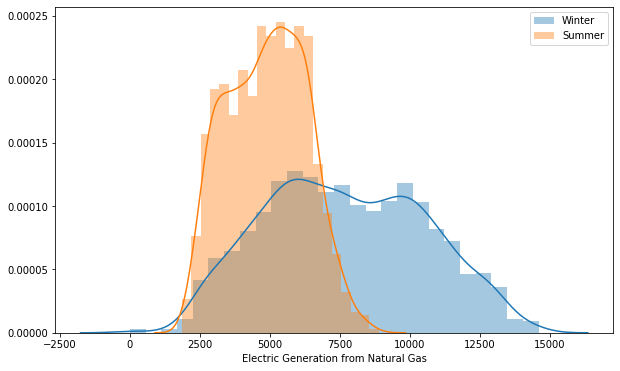

In [283]:
plt.figure(figsize=(10,6))
sns.distplot(ne['NG'].loc[(ne.months==6)|(ne.months==7)|(ne.months==8)], label = "Winter")
sns.distplot(ne['NG'].loc[(ne.months==12)|(ne.months==1)|(ne.months==2)], label = "Summer")
plt.xlabel('Electric Generation from Natural Gas')
plt.legend()

In [268]:
def plot_season(dflist,names,season)

In [ ]:
sns.distplot(ne['TOT'].loc[((ne.hour==13)|(ne.hour==14)|(ne.hour==15))&((ne.months==6)|(ne.months==7)|(ne.months==8))], label = "NE Night")

In [278]:
def gime_stats(df, colname):
    '''
    Given a dataframe and column name
    return the mean and variance
    '''

SyntaxError: invalid syntax (<ipython-input-278-b1dc3cf0aa61>, line 1)

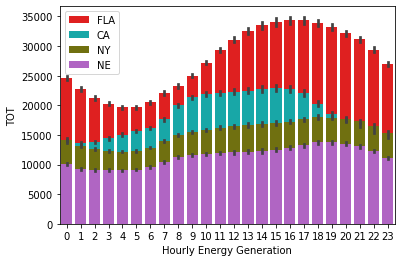

In [398]:

sns.barplot(x=fla['hour'],y=fla['TOT'],label='FLA', color='red')
sns.barplot(x=ca['hour'],y=ca['TOT'],label='CA',color='c')
sns.barplot(x=ny['hour'],y=ny['TOT'],label='NY',color='olive')
sns.barplot(x=ne['hour'],y=ne['TOT'],label='NE', color='mediumorchid')
plt.xlabel('Hourly Energy Generation')
plt.legend()


In [305]:
ne['TOT'].loc[(ne.months==6)|(ne.months==7)|(ne.months==8)].describe()

count     3695.000000
mean     13006.959946
std       3311.315610
min          0.000000
25%      10454.000000
50%      12691.000000
75%      15356.500000
max      23434.000000
Name: TOT, dtype: float64

In [284]:
ne['NG'].loc[(ne.months==12)|(ne.months==1)|(ne.months==2)].describe()

count    2160.000000
mean     4885.917130
std      1408.941094
min      1864.000000
25%      3733.750000
50%      4945.000000
75%      5986.250000
max      8891.000000
Name: NG, dtype: float64

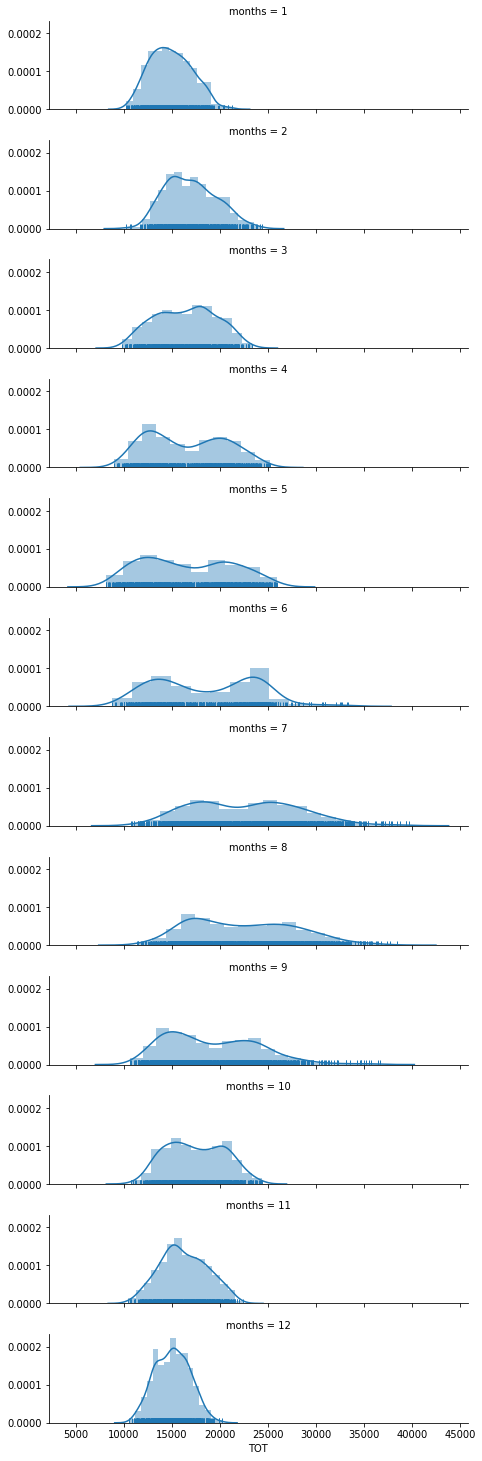

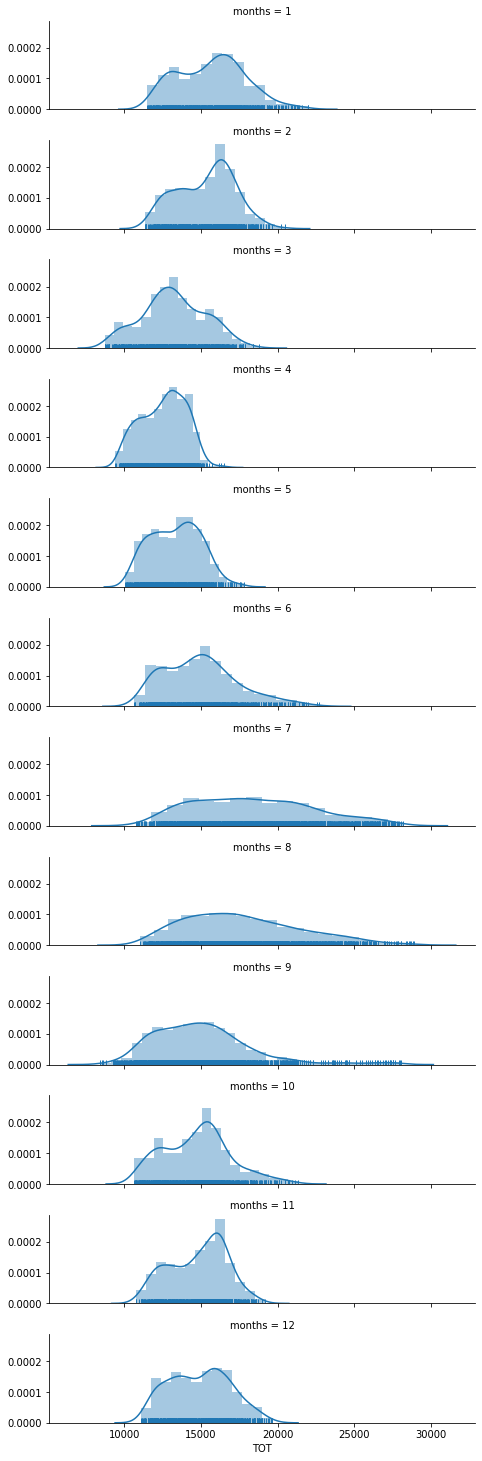

In [317]:
sns.FacetGrid(ca, row="months",
                  height=1.7, aspect=4,).map(sns.distplot, 'TOT', hist=True, rug=True)
sns.FacetGrid(ny, row="months",
                  height=1.7, aspect=4,).map(sns.distplot, 'TOT', hist=True, rug=True)

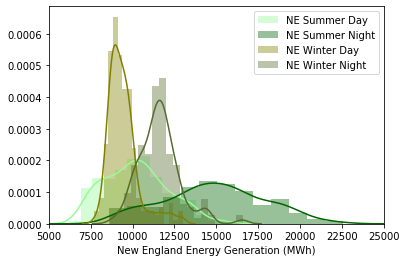

In [375]:
sns.distplot(ne['TOT'].loc[((ne.hour==1)|(ne.hour==2)|(ne.hour==3))&
                           ((ne.months==6)|(ne.months==7)|(ne.months==8))],
             label = "NE Summer Day",color= 'palegreen')
sns.distplot(ne['TOT'].loc[((ne.hour==13)|(ne.hour==14)|(ne.hour==15))&
                           ((ne.months==6)|(ne.months==7)|(ne.months==8))],
             label = "NE Summer Night",color= 'darkgreen')
sns.distplot(ne['TOT'].loc[((ne.hour==1)|(ne.hour==2)|(ne.hour==3))&
                           ((ne.months==12)|(ne.months==1)|(ne.months==2))],
             label = "NE Winter Day",color= 'olive')
sns.distplot(ne['TOT'].loc[((ne.hour==13)|(ne.hour==14)|(ne.hour==15))&
                           ((ne.months==12)|(ne.months==1)|(ne.months==2))],
             label = "NE Winter Night",color= 'darkolivegreen')
plt.xlim((5000,25000))
plt.xlabel('New England Energy Generation (MWh)')
plt.legend()

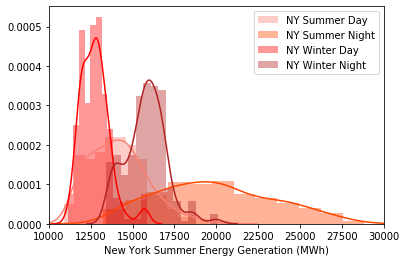

In [386]:
sns.distplot(ny['TOT'].loc[((ny.hour==1)|(ny.hour==2)|(ny.hour==3))&
                           ((ny.months==6)|(ny.months==7)|(ny.months==8))],
             label = "NY Summer Day", color='salmon')
sns.distplot(ny['TOT'].loc[((ny.hour==13)|(ny.hour==14)|(ny.hour==15))&
                           ((ny.months==6)|(ny.months==7)|(ny.months==8))],
             label = "NY Summer Night",color='orangered')
sns.distplot(ny['TOT'].loc[((ny.hour==1)|(ny.hour==2)|(ny.hour==3))&
                           ((ny.months==12)|(ny.months==1)|(ny.months==2))],
             label = "NY Winter Day", color='red')
sns.distplot(ny['TOT'].loc[((ny.hour==13)|(ny.hour==14)|(ny.hour==15))&
                           ((ny.months==12)|(ny.months==1)|(ny.months==2))],
             label = "NY Winter Night",color='firebrick')
plt.xlim((10000,30000))
plt.xlabel('New York Summer Energy Generation (MWh)')
plt.legend()

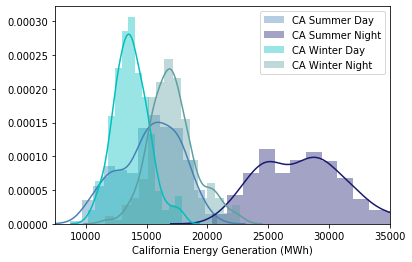

In [382]:
sns.distplot(ca['TOT'].loc[((ca.hour==1)|(ca.hour==2)|(ca.hour==3))&
                           ((ca.months==6)|(ca.months==7)|(ca.months==8))],
             label = "CA Summer Day",color='steelblue')
sns.distplot(ca['TOT'].loc[((ca.hour==13)|(ca.hour==14)|(ca.hour==15))&
                           ((ca.months==6)|(ca.months==7)|(ca.months==8))],
             label = "CA Summer Night",color='midnightblue')
sns.distplot(ca['TOT'].loc[((ca.hour==1)|(ca.hour==2)|(ca.hour==3))&
                           ((ca.months==12)|(ca.months==1)|(ca.months==2))],
             label = "CA Winter Day",color='c')
sns.distplot(ca['TOT'].loc[((ca.hour==13)|(ca.hour==14)|(ca.hour==15))&
                           ((ca.months==12)|(ca.months==1)|(ca.months==2))],
             label = "CA Winter Night",color='cadetblue')
plt.xlim((7500,35000))
plt.xlabel('California Energy Generation (MWh)')
plt.legend()

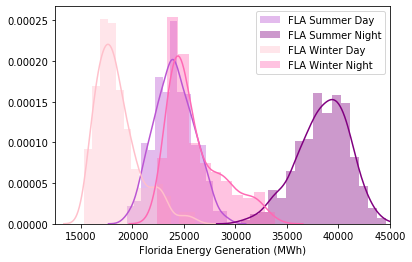

In [378]:
sns.distplot(fla['TOT'].loc[((fla.hour==1)|(fla.hour==2)|(fla.hour==3))&
                            ((fla.months==6)|(fla.months==7)|(fla.months==8))],
             label = "FLA Summer Day", color='mediumorchid')
sns.distplot(fla['TOT'].loc[((fla.hour==13)|(fla.hour==14)|(fla.hour==15))&
                            ((fla.months==6)|(fla.months==7)|(fla.months==8))],
             label = "FLA Summer Night", color='purple')
sns.distplot(fla['TOT'].loc[((fla.hour==1)|(fla.hour==2)|(fla.hour==3))&
                            ((fla.months==12)|(fla.months==1)|(fla.months==2))],
             label = "FLA Winter Day", color='pink')
sns.distplot(fla['TOT'].loc[((fla.hour==13)|(fla.hour==14)|(fla.hour==15))&
                            ((fla.months==12)|(fla.months==1)|(fla.months==2))],
             label = "FLA Winter Night", color='hotpink')
plt.xlim((12500,45000))
plt.xlabel('Florida Energy Generation (MWh)')
plt.legend()

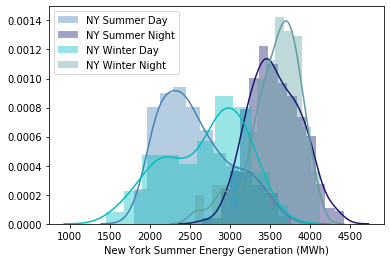

In [416]:
fueltype='WAT'
colors=blues
sns.distplot(ny[fueltype].loc[((ny.hour==1)|(ny.hour==2)|(ny.hour==3))&
                           ((ny.months==6)|(ny.months==7)|(ny.months==8))],
             label = "NY Summer Day", color=colors[3])
sns.distplot(ny[fueltype].loc[((ny.hour==13)|(ny.hour==14)|(ny.hour==15))&
                           ((ny.months==6)|(ny.months==7)|(ny.months==8))],
             label = "NY Summer Night",color=colors[2])
sns.distplot(ny[fueltype].loc[((ny.hour==1)|(ny.hour==2)|(ny.hour==3))&
                           ((ny.months==12)|(ny.months==1)|(ny.months==2))],
             label = "NY Winter Day", color=colors[1])
sns.distplot(ny[fueltype].loc[((ny.hour==13)|(ny.hour==14)|(ny.hour==15))&
                           ((ny.months==12)|(ny.months==1)|(ny.months==2))],
             label = "NY Winter Night",color=colors[0])
# plt.xlim((5000,5500))
plt.xlabel('New York Summer Energy Generation (MWh)')
plt.legend()

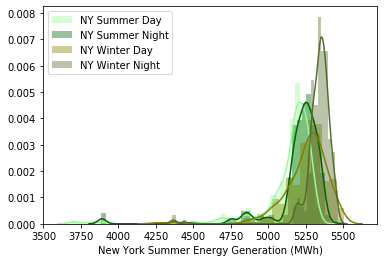

In [414]:
fueltype='NUC'
colors=greens
sns.distplot(ny[fueltype].loc[((ny.hour==1)|(ny.hour==2)|(ny.hour==3))&
                           ((ny.months==6)|(ny.months==7)|(ny.months==8))],
             label = "NY Summer Day", color=colors[3])
sns.distplot(ny[fueltype].loc[((ny.hour==13)|(ny.hour==14)|(ny.hour==15))&
                           ((ny.months==6)|(ny.months==7)|(ny.months==8))],
             label = "NY Summer Night",color=colors[2])
sns.distplot(ny[fueltype].loc[((ny.hour==1)|(ny.hour==2)|(ny.hour==3))&
                           ((ny.months==12)|(ny.months==1)|(ny.months==2))],
             label = "NY Winter Day", color=colors[1])
sns.distplot(ny[fueltype].loc[((ny.hour==13)|(ny.hour==14)|(ny.hour==15))&
                           ((ny.months==12)|(ny.months==1)|(ny.months==2))],
             label = "NY Winter Night",color=colors[0])
# plt.xlim((5000,5500))
plt.xlabel('New York Summer Energy Generation (MWh)')
plt.legend()

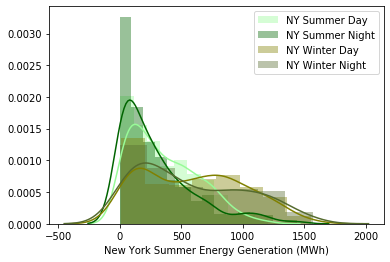

In [413]:
fueltype='WND'
colors=greens
sns.distplot(ny[fueltype].loc[((ny.hour==1)|(ny.hour==2)|(ny.hour==3))&
                           ((ny.months==6)|(ny.months==7)|(ny.months==8))],
             label = "NY Summer Day", color=colors[3])
sns.distplot(ny[fueltype].loc[((ny.hour==13)|(ny.hour==14)|(ny.hour==15))&
                           ((ny.months==6)|(ny.months==7)|(ny.months==8))],
             label = "NY Summer Night",color=colors[2])
sns.distplot(ny[fueltype].loc[((ny.hour==1)|(ny.hour==2)|(ny.hour==3))&
                           ((ny.months==12)|(ny.months==1)|(ny.months==2))],
             label = "NY Winter Day", color=colors[1])
sns.distplot(ny[fueltype].loc[((ny.hour==13)|(ny.hour==14)|(ny.hour==15))&
                           ((ny.months==12)|(ny.months==1)|(ny.months==2))],
             label = "NY Winter Night",color=colors[0])
# plt.xlim((5000,5500))
plt.xlabel('New York Summer Energy Generation (MWh)')
plt.legend()

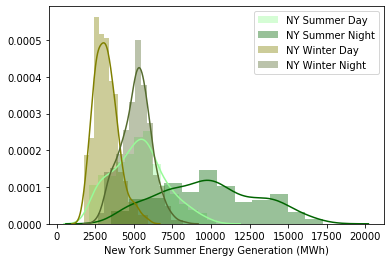

In [417]:
fueltype='NG'
colors=greens
sns.distplot(ny[fueltype].loc[((ny.hour==1)|(ny.hour==2)|(ny.hour==3))&
                           ((ny.months==6)|(ny.months==7)|(ny.months==8))],
             label = "NY Summer Day", color=colors[3])
sns.distplot(ny[fueltype].loc[((ny.hour==13)|(ny.hour==14)|(ny.hour==15))&
                           ((ny.months==6)|(ny.months==7)|(ny.months==8))],
             label = "NY Summer Night",color=colors[2])
sns.distplot(ny[fueltype].loc[((ny.hour==1)|(ny.hour==2)|(ny.hour==3))&
                           ((ny.months==12)|(ny.months==1)|(ny.months==2))],
             label = "NY Winter Day", color=colors[1])
sns.distplot(ny[fueltype].loc[((ny.hour==13)|(ny.hour==14)|(ny.hour==15))&
                           ((ny.months==12)|(ny.months==1)|(ny.months==2))],
             label = "NY Winter Night",color=colors[0])
# plt.xlim((5000,5500))
plt.xlabel('New York Summer Energy Generation (MWh)')
plt.legend()

Text(0.5, 0, 'New York Winter Day Energy Generation (MWh)')

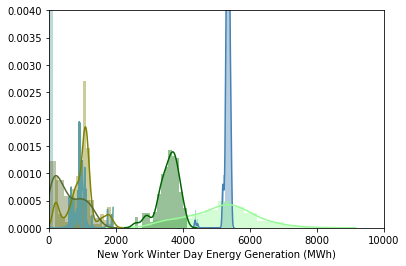

In [472]:
colors=greens
season=winter
state='NY'
time=day
db=ny
fuel='NUC'
sns.distplot(db[fuel].loc[((db.hour==time[0])|(db.hour==time[1])|(db.hour==time[2]))&
                           ((db.months==season[0])|(db.months==season[1])|(db.months==season[2]))],
             label = f"{state} {season[3]} {time[3]}, {fuel}",color='steelblue')
fuel='OIL'
sns.distplot(db[fuel].loc[((db.hour==time[0])|(db.hour==time[1])|(db.hour==time[2]))&
                           ((db.months==season[0])|(db.months==season[1])|(db.months==season[2]))],
             label = f"{state} {season[3]} {time[3]}, {fuel}",color='cadetblue')
fuel='NG'
sns.distplot(db[fuel].loc[((db.hour==time[0])|(db.hour==time[1])|(db.hour==time[2]))&
                           ((db.months==season[0])|(db.months==season[1])|(db.months==season[2]))],
             label = f"{state} {season[3]} {time[3]}, {fuel}",color=colors[3])
fuel='WAT'
sns.distplot(db[fuel].loc[((db.hour==time[0])|(db.hour==time[1])|(db.hour==time[2]))&
                           ((db.months==season[0])|(db.months==season[1])|(db.months==season[2]))],
             label = f"{state} {season[3]} {time[3]}, {fuel}",color=colors[2])
fuel='OTH'
sns.distplot(db[fuel].loc[((db.hour==time[0])|(db.hour==time[1])|(db.hour==time[2]))&
                           ((db.months==season[0])|(db.months==season[1])|(db.months==season[2]))],
             label = f"{state} {season[3]} {time[3]}, {fuel}",color=colors[1])
fuel='WND'
sns.distplot(db[fuel].loc[((db.hour==time[0])|(db.hour==time[1])|(db.hour==time[2]))&
                           ((db.months==season[0])|(db.months==season[1])|(db.months==season[2]))],
             label = f"{state} {season[3]} {time[3]}, {fuel}",color=colors[0])
plt.ylim((0,0.004))
plt.xlim((0,10000))
plt.xlabel(f'New York {season[3]} {time[3]} Energy Generation (MWh)')
# plt.legend()

Text(0.5, 0, 'New York Winter Night Energy Generation (MWh)')

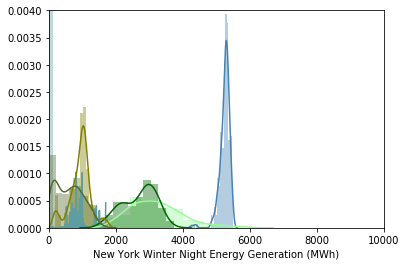

In [473]:
colors=greens
season=winter
state='NY'
time=night
db=ny
fuel='NUC'
sns.distplot(db[fuel].loc[((db.hour==time[0])|(db.hour==time[1])|(db.hour==time[2]))&
                           ((db.months==season[0])|(db.months==season[1])|(db.months==season[2]))],
             label = f"{state} {season[3]} {time[3]}, {fuel}",color='steelblue')
fuel='OIL'
sns.distplot(db[fuel].loc[((db.hour==time[0])|(db.hour==time[1])|(db.hour==time[2]))&
                           ((db.months==season[0])|(db.months==season[1])|(db.months==season[2]))],
             label = f"{state} {season[3]} {time[3]}, {fuel}",color='cadetblue')
fuel='NG'
sns.distplot(db[fuel].loc[((db.hour==time[0])|(db.hour==time[1])|(db.hour==time[2]))&
                           ((db.months==season[0])|(db.months==season[1])|(db.months==season[2]))],
             label = f"{state} {season[3]} {time[3]}, {fuel}",color=colors[3])
fuel='WAT'
sns.distplot(db[fuel].loc[((db.hour==time[0])|(db.hour==time[1])|(db.hour==time[2]))&
                           ((db.months==season[0])|(db.months==season[1])|(db.months==season[2]))],
             label = f"{state} {season[3]} {time[3]}, {fuel}",color=colors[2])
fuel='OTH'
sns.distplot(db[fuel].loc[((db.hour==time[0])|(db.hour==time[1])|(db.hour==time[2]))&
                           ((db.months==season[0])|(db.months==season[1])|(db.months==season[2]))],
             label = f"{state} {season[3]} {time[3]}, {fuel}",color=colors[1])
fuel='WND'
sns.distplot(db[fuel].loc[((db.hour==time[0])|(db.hour==time[1])|(db.hour==time[2]))&
                           ((db.months==season[0])|(db.months==season[1])|(db.months==season[2]))],
             label = f"{state} {season[3]} {time[3]}, {fuel}",color=colors[0])
plt.ylim((0,0.004))
plt.xlim((0,10000))
plt.xlabel(f'New York {season[3]} {time[3]} Energy Generation (MWh)')
# plt.legend()

Text(0.5, 0, 'New York Summer Day Energy Generation (MWh)')

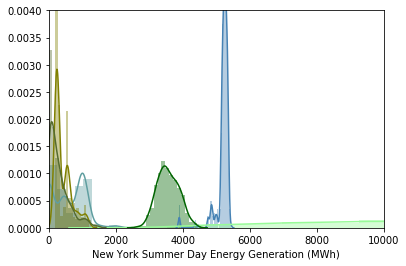

In [471]:
colors=greens
season=summer
state='NY'
time=day
db=ny
fuel='NUC'
sns.distplot(db[fuel].loc[((db.hour==time[0])|(db.hour==time[1])|(db.hour==time[2]))&
                           ((db.months==season[0])|(db.months==season[1])|(db.months==season[2]))],
             label = f"{state} {season[3]} {time[3]}, {fuel}",color='steelblue')
fuel='OIL'
sns.distplot(db[fuel].loc[((db.hour==time[0])|(db.hour==time[1])|(db.hour==time[2]))&
                           ((db.months==season[0])|(db.months==season[1])|(db.months==season[2]))],
             label = f"{state} {season[3]} {time[3]}, {fuel}",color='cadetblue')
fuel='NG'
sns.distplot(db[fuel].loc[((db.hour==time[0])|(db.hour==time[1])|(db.hour==time[2]))&
                           ((db.months==season[0])|(db.months==season[1])|(db.months==season[2]))],
             label = f"{state} {season[3]} {time[3]}, {fuel}",color=colors[3])
fuel='WAT'
sns.distplot(db[fuel].loc[((db.hour==time[0])|(db.hour==time[1])|(db.hour==time[2]))&
                           ((db.months==season[0])|(db.months==season[1])|(db.months==season[2]))],
             label = f"{state} {season[3]} {time[3]}, {fuel}",color=colors[2])
fuel='OTH'
sns.distplot(db[fuel].loc[((db.hour==time[0])|(db.hour==time[1])|(db.hour==time[2]))&
                           ((db.months==season[0])|(db.months==season[1])|(db.months==season[2]))],
             label = f"{state} {season[3]} {time[3]}, {fuel}",color=colors[1])
fuel='WND'
sns.distplot(db[fuel].loc[((db.hour==time[0])|(db.hour==time[1])|(db.hour==time[2]))&
                           ((db.months==season[0])|(db.months==season[1])|(db.months==season[2]))],
             label = f"{state} {season[3]} {time[3]}, {fuel}",color=colors[0])
plt.ylim((0,0.004))
plt.xlim((0,10000))
plt.xlabel(f'New York {season[3]} {time[3]} Energy Generation (MWh)')
# plt.legend()

Text(0.5, 0, 'New York Summer Night Energy Generation (MWh)')

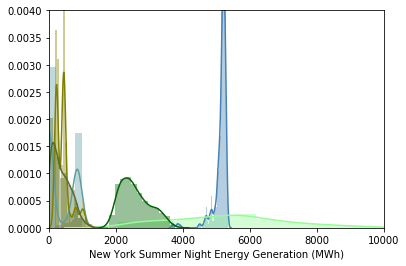

In [470]:
colors=greens
season=summer
state='NY'
time=night
db=ny
fuel='NUC'
sns.distplot(db[fuel].loc[((db.hour==time[0])|(db.hour==time[1])|(db.hour==time[2]))&
                           ((db.months==season[0])|(db.months==season[1])|(db.months==season[2]))],
             label = f"{state} {season[3]} {time[3]}, {fuel}",color='steelblue')
fuel='OIL'
sns.distplot(db[fuel].loc[((db.hour==time[0])|(db.hour==time[1])|(db.hour==time[2]))&
                           ((db.months==season[0])|(db.months==season[1])|(db.months==season[2]))],
             label = f"{state} {season[3]} {time[3]}, {fuel}",color='cadetblue')
fuel='NG'
sns.distplot(db[fuel].loc[((db.hour==time[0])|(db.hour==time[1])|(db.hour==time[2]))&
                           ((db.months==season[0])|(db.months==season[1])|(db.months==season[2]))],
             label = f"{state} {season[3]} {time[3]}, {fuel}",color=colors[3])
fuel='WAT'
sns.distplot(db[fuel].loc[((db.hour==time[0])|(db.hour==time[1])|(db.hour==time[2]))&
                           ((db.months==season[0])|(db.months==season[1])|(db.months==season[2]))],
             label = f"{state} {season[3]} {time[3]}, {fuel}",color=colors[2])
fuel='OTH'
sns.distplot(db[fuel].loc[((db.hour==time[0])|(db.hour==time[1])|(db.hour==time[2]))&
                           ((db.months==season[0])|(db.months==season[1])|(db.months==season[2]))],
             label = f"{state} {season[3]} {time[3]}, {fuel}",color=colors[1])
fuel='WND'
sns.distplot(db[fuel].loc[((db.hour==time[0])|(db.hour==time[1])|(db.hour==time[2]))&
                           ((db.months==season[0])|(db.months==season[1])|(db.months==season[2]))],
             label = f"{state} {season[3]} {time[3]}, {fuel}",color=colors[0])
plt.ylim((0,0.004))
plt.xlim((0,10000))
plt.xlabel(f'New York {season[3]} {time[3]} Energy Generation (MWh)')
# plt.legend()

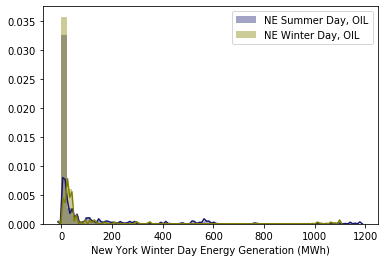

In [453]:
colors=blues
season=summer
state='NE'
time=day
db=ne
fuel='OIL'
sns.distplot(db[fuel].loc[((db.hour==time[0])|(db.hour==time[1])|(db.hour==time[2]))&
                           ((db.months==season[0])|(db.months==season[1])|(db.months==season[2]))],
             label = f"{state} {season[3]} {time[3]}, {fuel}",color=colors[2])

colors=greens
season=winter
state='NE'
time=day
db=ne
fuel='OIL'
sns.distplot(db[fuel].loc[((db.hour==time[0])|(db.hour==time[1])|(db.hour==time[2]))&
                           ((db.months==season[0])|(db.months==season[1])|(db.months==season[2]))],
             label = f"{state} {season[3]} {time[3]}, {fuel}",color=colors[1])

plt.xlabel(f'New York {season[3]} {time[3]} Energy Generation (MWh)')
plt.legend()

In [455]:
def season_col(df, months):
    '''
    Function should be passed a dataframe and name of date column
    Returns a new data frame with with month column
    '''
    seasonal=[]
    for i,row in df.iterrows():
        if ((row.months==6)|(row.months==7)|(row.months==8)):
            seasonal.append('summer')
        if ((row.months==9)|(row.months==10)|(row.months==11)):
            seasonal.append('fall')
        if ((row.months==12)|(row.months==1)|(row.months==2)):
            seasonal.append('winter')
        if ((row.months==3)|(row.months==4)|(row.months==5)):
            seasonal.append('spring')
    df['season']=seasonal
    return df

In [456]:
ne=season_col(ne,'months')
ne

,Date,COL,NG,WAT,OTH,NUC,OIL,SUN,WND,months,hour,TOT,season
0,2019-10-02 00:00:00,0,6051,320,635,3288,0,0,646,10,0,10940,fall
1,2019-10-01 23:00:00,0,6978,262,632,3275,4,0,672,10,23,11823,fall
2,2019-10-01 22:00:00,14,8123,277,648,3273,15,0,610,10,22,12960,fall
3,2019-10-01 21:00:00,26,8748,433,649,3279,15,0,613,10,21,13763,fall
4,2019-10-01 20:00:00,31,9196,1119,640,3293,15,0,527,10,20,14821,fall
5,2019-10-01 19:00:00,39,9138,1212,641,3315,15,1,502,10,19,14863,fall
6,2019-10-01 18:00:00,26,9261,1178,630,3307,15,18,445,10,18,14880,fall
7,2019-10-01 17:00:00,26,9034,915,635,3325,15,47,379,10,17,14376,fall
8,2019-10-01 16:00:00,26,8722,588,631,3310,15,51,341,10,16,13684,fall
9,2019-10-01 15:00:00,26,8476,560,610,3321,15,61,246,10,15,13315,fall


In [458]:
def time_of_day_col(df, hour):
    '''
    Function should be passed a dataframe and name of date column
    Returns a new data frame with with month column
    '''
    TOD=[]
    for i,row in df.iterrows():
        if ((row.hour==23)|(row.hour==0)|(row.hour==2)|(row.hour==3)|(row.hour==4)|(row.hour==1)):
            TOD.append('night')
        if ((row.hour==5)|(row.hour==6)|(row.hour==7)|(row.hour==8)|(row.hour==9)|(row.hour==10)):
            TOD.append('morning')
        if ((row.hour==11)|(row.hour==12)|(row.hour==13)|(row.hour==14)|(row.hour==15)|(row.hour==16)):
            TOD.append('day')
        if ((row.hour==17)|(row.hour==18)|(row.hour==19)|(row.hour==20)|(row.hour==21)|(row.hour==22)):
            TOD.append('evening')
    df['TOD']=TOD
    return df

In [459]:
ne=time_of_day_col(ne,'hour')

In [460]:
ne

,Date,COL,NG,WAT,OTH,NUC,OIL,SUN,WND,months,hour,TOT,season,TOD
0,2019-10-02 00:00:00,0,6051,320,635,3288,0,0,646,10,0,10940,fall,night
1,2019-10-01 23:00:00,0,6978,262,632,3275,4,0,672,10,23,11823,fall,night
2,2019-10-01 22:00:00,14,8123,277,648,3273,15,0,610,10,22,12960,fall,evening
3,2019-10-01 21:00:00,26,8748,433,649,3279,15,0,613,10,21,13763,fall,evening
4,2019-10-01 20:00:00,31,9196,1119,640,3293,15,0,527,10,20,14821,fall,evening
5,2019-10-01 19:00:00,39,9138,1212,641,3315,15,1,502,10,19,14863,fall,evening
6,2019-10-01 18:00:00,26,9261,1178,630,3307,15,18,445,10,18,14880,fall,evening
7,2019-10-01 17:00:00,26,9034,915,635,3325,15,47,379,10,17,14376,fall,evening
8,2019-10-01 16:00:00,26,8722,588,631,3310,15,51,341,10,16,13684,fall,day
9,2019-10-01 15:00:00,26,8476,560,610,3321,15,61,246,10,15,13315,fall,day
